# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Desiree Thompson - https://github.com/DesireeEDU/Final-Project-Web-Mining-and-NLP

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [243]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   VersionAll prereqs installed.

------------------------- --------
anyio                     3.7.1
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
asttokens                 2.2.1
async-lru                 2.0.3
attrs                     23.1.0
Babel                     2.12.1
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.0.0
blis                      0.7.9
catalogue                 2.0.8
certifi                   2023.5.7
cffi                      1.15.1
charset-normalizer        3.2.0
click                     8.1.5
colorama                  0.4.6
comm                      0.1.3
confection                0.1.0
contourpy                 1.1.0
cycler                    0.11.0
cymem                     2.0.7
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm            3.6.0
executing                 1.2.0
fa


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [244]:
response = requests.get("https://www.usda.gov/media/blog/2023/04/28/integrating-nutrition-healthcare-midwest")

parser = "html.parser"

soup = BeautifulSoup(response.text, parser)

with open("article_html.pkl", "wb") as f:
    pickle.dump(response.text, f)

#### Question 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [245]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

with open("article_html.pkl", "rb") as f:
    article_html = pickle.load(f)
    
parser = "html.parser"
    
soup = BeautifulSoup(article_html, parser)
    
article_element = soup.find("article")

# print(article_element.get_text())

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")
doc = nlp(article_element.get_text())

sentences = list(doc.sents)        
sentence_count = len(sentences)

print(f"The polarity score for the article 'Integrating Nutrition into Healthcare in the Midwest' is {doc._.polarity:.2}.")
print(f"The referenced article has {sentence_count} sentences.")
                                                                     



The polarity score for the article 'Integrating Nutrition into Healthcare in the Midwest' is 0.25.
The referenced article has 19 sentences.


#### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [246]:
article_tokens = []
for token in doc:
    if not token.is_space:
        article_tokens.append(token)
        
def selected_tokens(token):
    return not (token.is_space or token.is_punct or token.is_stop)
        
active_tokens = [token.text.lower() for token in doc if selected_tokens(token)]

token_freq = Counter(map(str, active_tokens))

print(f"Them most common tokens and their respective frequencies are as follows:\n{token_freq.most_common(5)}.")

Them most common tokens and their respective frequencies are as follows:
[('health', 12), ('nutrition', 12), ('food', 11), ('farm', 8), ('healthy', 4)].


#### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [247]:
active_lemmas = [token.lemma_.lower() for token in doc if selected_tokens(token)]

lemma_freq = Counter(map(str, active_lemmas))

print(f"Them most common lemmas and their respective frequencies are as follows:\n{lemma_freq.most_common(5)}.")


Them most common lemmas and their respective frequencies are as follows:
[('food', 13), ('health', 12), ('nutrition', 12), ('farm', 9), ('healthy', 5)].


#### Question 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

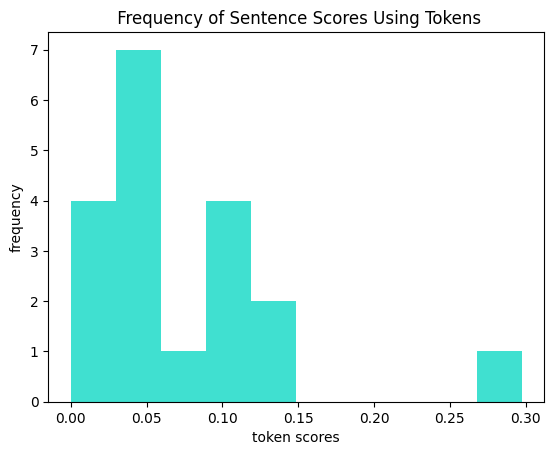

The most common range of token scores is around 0.04 to 0.06.


In [248]:
sentences = list(doc.sents)   

interesting_tokens = set()
for token, freq in token_freq.most_common(5):
    interesting_tokens.add(token)

def score_sentence_by_token(sentence, interesting_tokens):
    token_count = 0
    for token in sentence:
        if token.text.lower() in interesting_tokens:
            token_count += 1
    sentence_count = 0    
    for token in sentence:
        if not (token.is_space or token.is_punct):
            sentence_count += 1
            
    return token_count / sentence_count

token_list = []
for i in range (0, len(sentences)):    
   token_list.append(score_sentence_by_token(sentences[i], interesting_tokens))
   
plt.hist(token_list, color = "turquoise")
plt.title(" Frequency of Sentence Scores Using Tokens")
plt.xlabel("token scores")
plt.yticks(np.arange(0,8,1))
plt.ylabel("frequency")
plt.show()

print("The most common range of token scores is around 0.04 to 0.06.")



#### Question 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

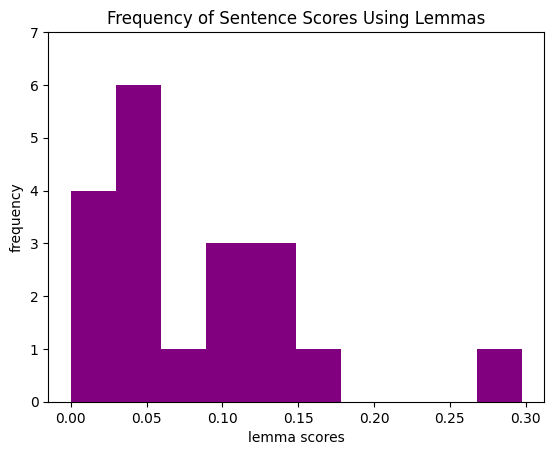

The most common range of lemma scores is also around 0.03 to 0.06


In [249]:
sentences = list(doc.sents)   

interesting_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    interesting_lemmas.add(lemma)
    
def score_sentence_by_lemma(sentence, interesting_lemmas):
    lemma_count = 0
    for lemma in sentence:
        if lemma.lemma_.lower() in interesting_lemmas:
            lemma_count += 1
    sentence_count = 0    
    for token in sentence:
        if not (token.is_space or token.is_punct):
            sentence_count += 1
            
    return lemma_count / sentence_count

lemma_list = []
for i in range (0, len(sentences)):    
   lemma_list.append(score_sentence_by_lemma(sentences[i], interesting_lemmas))
plt.hist(lemma_list, color = "purple")
plt.title("Frequency of Sentence Scores Using Lemmas")
plt.xlabel("lemma scores")
# plt.xticks(np.arange(0,.25,.250))
plt.yticks(np.arange(0,8,1))
plt.ylabel("frequency")
plt.show()

print("The most common range of lemma scores is also around 0.03 to 0.06")


#### Question 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.05
* Cutoff Score (lemmas): 0.10

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

#### Question 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [250]:
token_summary = []
for sentence in sentences:
    if score_sentence_by_token(sentence, interesting_tokens) >= 0.05:
        token_summary.append(sentence.text.strip())
#print(f"The number of sentences in the summary that are greater than the cutoff score of 0.05 is {len(article_summary)}")
print(token_summary)


['Posted by Sandra MacMartin, Public Affairs Specialist, FNS Midwest Region with Guest Author, Amanda Sweetman, Regional Director of Farming and Healthy Lifestyles for the Farm at Trinity Health in\n    \n                                                                                                                                                                                                                                              Food and Nutrition\nNutrition Security\n\n Apr 27, 2023 \n\n \n\n\nCan you imagine a day when healthcare is mostly proactive as opposed to reactive?', 'That was the focus of our discussions in late March at the second regional Come to the Table summit on nutrition security and healthcare at Trinity Health in Ypsilanti, Michigan, hosted by ProMedica and The Root Cause Coalition.', 'Alonzo Lewis, president of Trinity Health Ann Arbor, set the tone by encouraging the 150 stakeholders in attendance to build on the momentum of the White House Conference on

#### Question 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [251]:
from textblob import TextBlob

text = str(token_summary)
blob = TextBlob(text)
token_summary_polarity = blob.polarity

print(f"The polarity of the summary is {token_summary_polarity:.2}.")
print(f"The number of sentences in the summary is {len(token_summary)}.")


The polarity of the summary is 0.26.
The number of sentences in the summary is 10.


#### Question 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [252]:
lemma_summary = []
for sentence in sentences:
    if score_sentence_by_lemma(sentence, interesting_lemmas) >= 0.10:
        lemma_summary.append(sentence.text.strip())
#print(f"The number of sentences in the summary that are greater than the cutoff score of 0.05 is {len(lemma_summary)}")
print(lemma_summary)

['Posted by Sandra MacMartin, Public Affairs Specialist, FNS Midwest Region with Guest Author, Amanda Sweetman, Regional Director of Farming and Healthy Lifestyles for the Farm at Trinity Health in\n    \n                                                                                                                                                                                                                                              Food and Nutrition\nNutrition Security\n\n Apr 27, 2023 \n\n \n\n\nCan you imagine a day when healthcare is mostly proactive as opposed to reactive?', 'After the summit, attendees visited The Farm, one of the nation’s oldest hospital-based farms.', 'The Farm evolved from a discussion about food as medicine among health care professionals into the multi-faceted, regional program it is today.', 'And, because access to healthy food is only the first step toward better health outcomes, The Farm also offers education programs field trips, summer camp, and 

#### Question 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [253]:
text = str(lemma_summary)
blob = TextBlob(text)
lemma_summary_polarity = blob.polarity

print(f"The polarity of the summary is {lemma_summary_polarity:.2}.")
print(f"The number of sentences in the summary is {len(lemma_summary)}.")


The polarity of the summary is 0.32.
The number of sentences in the summary is 6.


#### Question 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The initial article summary is 0.25. The refined summaries of tokens and lemmas after considering the cut off were 0.26 and 0.32 respetively. I believe that the scores increased in the refined summaries due to the the increased concentration of the words in the tokens and lemmas. This also explains the increase from the refined token to the refined lemmas as the lemmas are even more specific. Also the number of lemmas was less than the number of tokes which would lead to an increase as well. 

#### Question 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Based upon my reading of the article, I think the difference in the scores is not that meaningful. However, as I feel many would only the skim the article for the major points, the review lemma summary may be a little closer to what an actual reader may experience. 